
BPE Training Started

Merge 01: ('w', 'e') (freq=8)
Merge 02: ('l', 'o') (freq=7)
Merge 03: ('lo', 'we') (freq=4)
Merge 04: ('r', '</w>') (freq=4)
Merge 05: ('n', 'e') (freq=4)
Merge 06: ('ne', 'we') (freq=4)
Merge 07: ('s', 't') (freq=4)
Merge 08: ('st', '</w>') (freq=4)
Merge 09: ('lo', 'w') (freq=3)
Merge 10: ('low', '</w>') (freq=3)
Merge 11: ('lowe', 'r</w>') (freq=2)
Merge 12: ('newe', 'st</w>') (freq=2)
Merge 13: ('newe', 'r</w>') (freq=2)
Merge 14: ('lowe', 'st</w>') (freq=2)

 Learned BPE Merge Rules:
('w', 'e')
('l', 'o')
('lo', 'we')
('r', '</w>')
('n', 'e')
('ne', 'we')
('s', 't')
('st', '</w>')
('lo', 'w')
('low', '</w>')
('lowe', 'r</w>')
('newe', 'st</w>')
('newe', 'r</w>')
('lowe', 'st</w>')


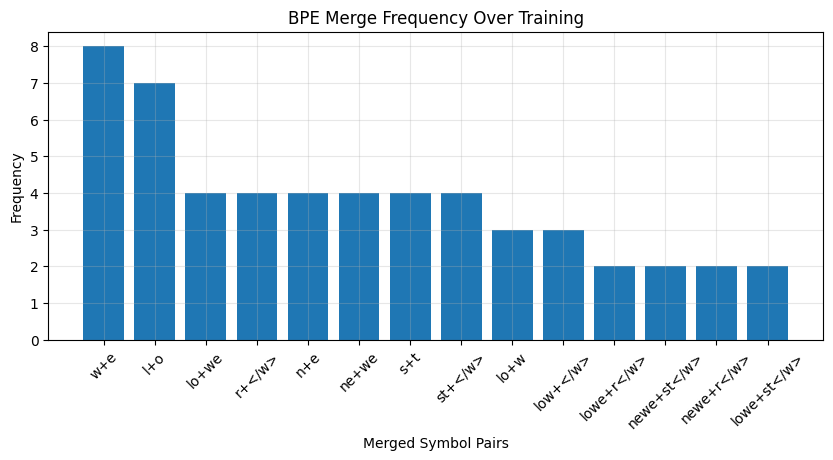


 Original Text:
lowest newer

 Encoded Tokens:
['lowest</w>', 'newer</w>']

 Decoded Text:
lowestnewer


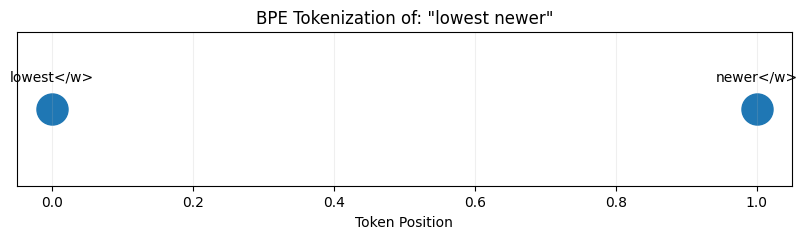

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

# 1. Training Corpus
corpus = [
    "low low lower",
    "newest newer",
    "low newer",
    "lower lowest",
    "newest lowest"
]

# 2. Build Initial Vocabulary (character level)
def build_vocab(corpus):
    vocab = defaultdict(int)
    for sentence in corpus:
        for word in sentence.split():
            tokens = " ".join(list(word)) + " </w>"
            vocab[tokens] += 1
    return vocab

# 3. Count Pair Frequencies
def get_pair_stats(vocab):
    pairs = Counter()
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[(symbols[i], symbols[i + 1])] += freq
    return pairs

# 4. Merge Most Frequent Pair
def merge_pair(pair, vocab):
    new_vocab = {}
    bigram = " ".join(pair)
    merged = "".join(pair)

    for word in vocab:
        new_word = word.replace(bigram, merged)
        new_vocab[new_word] = vocab[word]

    return new_vocab

# 5. Train BPE
def train_bpe(corpus, num_merges=15):
    vocab = build_vocab(corpus)
    merges = []
    pair_history = []

    print ("\nBPE Training Started\n")

    for i in range(num_merges):
        pairs = get_pair_stats(vocab)
        if not pairs:
            break

        best_pair, freq = pairs.most_common(1)[0]
        vocab = merge_pair(best_pair, vocab)
        merges.append(best_pair)
        pair_history.append((best_pair, freq))

        print(f"Merge {i+1:02d}: {best_pair} (freq={freq})")

    return vocab, merges, pair_history

# 6. Encode Word using Learned Merges
def encode_word(word, merges):
    tokens = list(word) + ["</w>"]
    
    for merge in merges:
        i = 0
        while i < len(tokens) - 1:
            if tokens[i] == merge[0] and tokens[i + 1] == merge[1]:
                tokens[i:i+2] = ["".join(merge)]
            else:
                i += 1
    return tokens

# 7. Encode Full Text
def encode(text, merges):
    output = []
    for word in text.split():
        output.extend(encode_word(word, merges))
    return output

# 8. Decode Tokens back to Text
def decode(tokens):
    return "".join(tokens).replace("</w>", "").strip()

# Visualization
# 1. Merge Frequencies
def plot_merge_frequencies(pair_history):
    labels = [f"{a}+{b}" for (a,b), _ in pair_history]
    freqs = [f for _, f in pair_history]

    plt.figure(figsize=(10,4))
    plt.bar(labels, freqs)
    plt.xticks(rotation=45)
    plt.xlabel("Merged Symbol Pairs")
    plt.ylabel("Frequency")
    plt.title("BPE Merge Frequency Over Training")
    plt.grid(alpha=0.3)
    plt.show()

# 2. Tokenization Example
def visualize_tokenization(text, merges):
    tokens = encode(text, merges)

    plt.figure(figsize=(10,2))
    plt.scatter(range(len(tokens)), [1]*len(tokens), s=500)

    for i, token in enumerate(tokens):
        plt.text(i, 1.02, token, ha='center', fontsize=10)

    plt.yticks([])
    plt.xlabel("Token Position")
    plt.title(f"BPE Tokenization of: \"{text}\"")
    plt.grid(alpha=0.2)
    plt.show()


# run everything
if __name__ == "__main__":
    vocab, merges, pair_history = train_bpe(corpus, num_merges=15)

    print("\n Learned BPE Merge Rules:")
    for m in merges:
        print(m)

    plot_merge_frequencies(pair_history)

    # Test sentence
    test_text = "lowest newer"

    encoded = encode(test_text, merges)
    decoded = decode(encoded)

    print("\n Original Text:")
    print(test_text)

    print("\n Encoded Tokens:")
    print(encoded)

    print("\n Decoded Text:")
    print(decoded)

    visualize_tokenization(test_text, merges)